***Penguin Dataset Data Preprocessing***

**Importing libraries**

In [1]:
#Importing Libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

**Reading data and handling mismatched string formats**

In [2]:
#Reading the data
df = pd.read_csv(r'/Users/adarshreddy/Downloads/noisy_datasets/penguins.csv')

#Cleaning categorial columns

display(df['species'].unique())
display(df['island'].unique())
display(df['gender'].unique())
display(df['year'].unique())

#Convert strings to lower lase to avoid case senstivity issues.
df['species']=df['species'].str.lower()
df['island']=df['island'].str.lower()
df['gender']=df['gender'].str.lower()

array(['Adelie', 'adelie', nan, 'Gentoo', 'gentoo', 'GENTOO', 'Chinstrap',
       'CHINSTRAP', 'chinstrap'], dtype=object)

array(['Torgersen', 'Biscoe', nan, 'Dream', 'torgersen', 'biscoe',
       'BISCOE', 'dream', 'DREAM'], dtype=object)

array(['male', 'female', nan, 'FEMALE', 'MALE'], dtype=object)

array([2007., 2008., 2009.,   nan])

In [3]:
#checking rows with null values
print("count of null values")
rows_with_null = df.isnull().sum(axis=1)
print(len(rows_with_null[rows_with_null > 0]))

mis_values = (df.isnull().sum())
print(mis_values)

count of null values
39
species                   11
island                    10
calorie requirement        0
average sleep duration     0
bill_length_mm             7
bill_depth_mm             11
flipper_length_mm          8
body_mass_g                5
gender                    17
year                       2
dtype: int64


**Key Statistics**


In [4]:
#Key statistics

df_numerical=['calorie requirement','average sleep duration','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
cat_cols = ['species', 'island','gender','year']

#Mean
mean=df[df_numerical].mean()
display(mean)

#Median
median=df[df_numerical].median()
display(median)

#Mode
mode=df[cat_cols].mode()
display(mode)

#min and max
min_values=df[df_numerical].min()
max_values=df[df_numerical].max()
display(min_values)
display(max_values)

#quartiles

display(df[df_numerical].quantile(0.25))
display(df[df_numerical].quantile(0.50))
display(df[df_numerical].quantile(0.75))

#counts
print(df.nunique())

#standard deviation
deviation=df[df_numerical].std()
display(deviation)

calorie requirement       5270.002907
average sleep duration      10.447674
bill_length_mm              45.494214
bill_depth_mm               18.018318
flipper_length_mm          197.764881
body_mass_g               4175.463127
dtype: float64

calorie requirement       5106.5
average sleep duration      10.0
bill_length_mm              45.1
bill_depth_mm               17.3
flipper_length_mm          197.0
body_mass_g               4050.0
dtype: float64

,species,island,gender,year
0,adelie,biscoe,male,2009.0


calorie requirement       3504.0
average sleep duration       7.0
bill_length_mm              32.1
bill_depth_mm               13.1
flipper_length_mm           10.0
body_mass_g                882.0
dtype: float64

calorie requirement       7197.00
average sleep duration      14.00
bill_length_mm             124.30
bill_depth_mm              127.26
flipper_length_mm          231.00
body_mass_g               6300.00
dtype: float64

calorie requirement       4403.0
average sleep duration       9.0
bill_length_mm              39.5
bill_depth_mm               15.7
flipper_length_mm          190.0
body_mass_g               3550.0
Name: 0.25, dtype: float64

calorie requirement       5106.5
average sleep duration      10.0
bill_length_mm              45.1
bill_depth_mm               17.3
flipper_length_mm          197.0
body_mass_g               4050.0
Name: 0.5, dtype: float64

calorie requirement       6212.75
average sleep duration      12.00
bill_length_mm              49.00
bill_depth_mm               18.70
flipper_length_mm          213.00
body_mass_g               4750.00
Name: 0.75, dtype: float64

species                     3
island                      3
calorie requirement       333
average sleep duration      8
bill_length_mm            172
bill_depth_mm              83
flipper_length_mm          60
body_mass_g                97
gender                      2
year                        3
dtype: int64


calorie requirement       1067.959116
average sleep duration       2.265895
bill_length_mm              10.815787
bill_depth_mm                9.241384
flipper_length_mm           27.764491
body_mass_g                858.713267
dtype: float64

**Handling missing entries**

In [5]:
#displaying all rows with null values
display(df[df.isna().any(axis=1)].head(5))
display(len(df))

#Gathering all null value rows in a new df for handlining missing values
null_df=df[df.isna().any(axis=1)]
print(len(null_df))
#Removing Null rows containing null values to handle them seperatly.
main_df=df[df.notna().all(axis=1)]
print(len(main_df))

,species,island,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,gender,year
3,adelie,torgersen,4169,8,NaN,NaN,NaN,992.0,NaN,2007.0
8,adelie,torgersen,5593,8,34.1,18.1,193.0,3475.0,NaN,2007.0
9,adelie,torgersen,6275,7,42.0,20.2,190.0,4250.0,NaN,2007.0
10,adelie,torgersen,5135,10,37.8,17.1,186.0,3300.0,NaN,2007.0
11,adelie,torgersen,6021,7,37.8,17.3,180.0,3700.0,NaN,2007.0


344

39
305


Text(0.5, 1.0, 'flipper length and body mass')

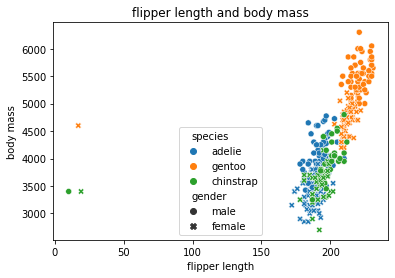

In [6]:
# Filling the missing values of gender
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species',style='gender', data=df)
plt.xlabel('flipper length')
plt.ylabel('body mass')
plt.title('flipper length and body mass')

In [7]:
### Handling missing values in gender after filtering for rows containing information on species and body_mass_g

spc_bod_df = null_df[null_df['species'].notna() & null_df['gender'].isna() & null_df['body_mass_g'].notna()]

spc_bod_df['gender'] = np.where(spc_bod_df['gender'].isna() & (spc_bod_df['species'] == 'adelie') & (spc_bod_df['body_mass_g'] <= 3800) , 'female',
                          np.where(spc_bod_df['gender'].isna() & (spc_bod_df['species'] == 'adelie') & (spc_bod_df['body_mass_g'] > 3800), 'male',
                                   spc_bod_df['gender']))

spc_bod_df['gender'] = np.where(spc_bod_df['gender'].isna() & (spc_bod_df['species'] == 'gentoo') & (spc_bod_df['body_mass_g'] <= 5100) , 'female',
                          np.where(spc_bod_df['gender'].isna() & (spc_bod_df['species'] == 'gentoo') & (spc_bod_df['body_mass_g'] > 5100), 'male',
                                   spc_bod_df['gender']))

spc_bod_df['gender'] = np.where( spc_bod_df['gender'].isna() & (spc_bod_df['species'] == 'chinstrap') & (spc_bod_df['body_mass_g'] <= 3800) , 'female',
                          np.where(spc_bod_df['gender'].isna() & (spc_bod_df['species'] == 'chinstrap') & (spc_bod_df['body_mass_g'] > 3800), 'male',
                                   spc_bod_df['gender']))



### Filtered data of rows containing information on species and gender. We also concatinated above acquired handled data this data.

spc_gen_df = null_df[null_df['species'].notna() & null_df['gender'].notna()]
spc_gen_df= pd.concat([spc_gen_df, spc_bod_df], ignore_index=True)

# calculating Mean of each species of all columns for each species
mean_cal=df.groupby(['species','gender'])[['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']].mean()
mean_cal = mean_cal.rename(columns={'bill_length_mm': 'avg_bill_length','bill_depth_mm': 'avg_bill_depth','flipper_length_mm': 'avg_flipper_length','body_mass_g': 'avg_body_mass'})

# Replaced null values where species and gender are not null by replacing bill_length_mm, 
# bill_depth_mm, flipper_length_mm, body_mass_g with mean values of that specific species and gender.

spc_gen_df = spc_gen_df[spc_gen_df['species'].notna() & spc_gen_df['gender'].notna()]
spc_gen_df = spc_gen_df.merge(mean_cal, on=['species', 'gender'], how='left')

columns = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g']
columns_to_replace = ['avg_bill_length','avg_bill_depth','avg_flipper_length','avg_body_mass']
for i in range(len(columns)):
    spc_gen_df[columns[i]].fillna(spc_gen_df[columns_to_replace[i]], inplace=True)
    
spc_gen_df.drop(columns=columns_to_replace, inplace=True)



### Now, we are handling missing values of rows that have null values in species column
spc_not_df = null_df[null_df['species'].isna()]
spc_not_df['species'] = np.where(spc_not_df['body_mass_g'] <= 4500, 'adelie', 'gentoo')

spc_not_df = spc_not_df.merge(mean_cal, on=['species', 'gender'], how='left')

columns = ['bill_length_mm', 'bill_depth_mm','flipper_length_mm','body_mass_g']
columns_to_replace = ['avg_bill_length','avg_bill_depth','avg_flipper_length','avg_body_mass']
for i in range(len(columns)):
    spc_not_df[columns[i]].fillna(spc_not_df[columns_to_replace[i]], inplace=True)
    
spc_not_df.drop(columns=columns_to_replace, inplace=True)


### Combining all the above three handled dataframes to fill the rest of the missing values with mode and mean 
gen_bm_not_df=null_df[null_df['body_mass_g'].isna() & null_df['gender'].isna()]
Pre_final_data= pd.concat([spc_gen_df, spc_not_df, gen_bm_not_df], ignore_index=True)


#final repacing the missing values with mean and mode
cat_cols = ['species', 'island','gender','year']
for i in cat_cols:
    mode_value = Pre_final_data[i].mode()[0]
    Pre_final_data[i] = Pre_final_data[i].fillna(mode_value)
    
num_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
for i in num_cols:
    mean_value = Pre_final_data[i].mean()
    Pre_final_data[i] = Pre_final_data[i].fillna(mean_value)  

print(len(Pre_final_data))
Final_cleaned_data= pd.concat([Pre_final_data,main_df], ignore_index=True)
print(len(Final_cleaned_data))


39
344


/Users/adarshreddy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/adarshreddy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/adarshreddy/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try

**Handling Outliers**

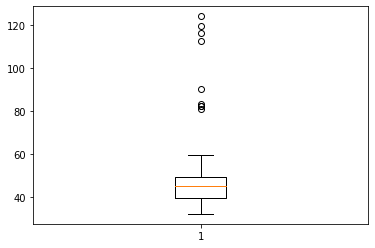

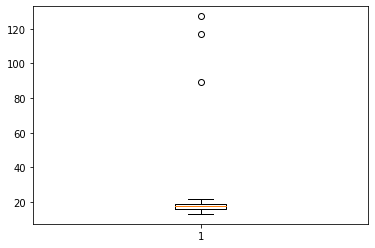

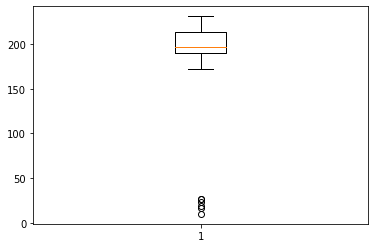

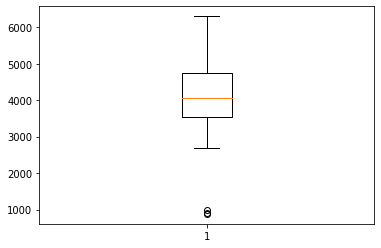

In [8]:
### Handling outliers
for i in num_cols:
    plt.figure()  
    plt.boxplot(Final_cleaned_data[i])
plt.show()


mean_value_1 = Final_cleaned_data['bill_length_mm'].mean()
Final_cleaned_data['bill_length_mm'] = np.where(Final_cleaned_data['bill_length_mm']>=60, mean_value_1,Final_cleaned_data['bill_length_mm'])

mean_value_2 = Final_cleaned_data['bill_depth_mm'].mean()
Final_cleaned_data['bill_depth_mm'] = np.where(Final_cleaned_data['bill_depth_mm']>=30, mean_value_2,Final_cleaned_data['bill_depth_mm'])

mean_value_3 = Final_cleaned_data['flipper_length_mm'].mean()
Final_cleaned_data['flipper_length_mm'] = np.where(Final_cleaned_data['flipper_length_mm']<=175, mean_value_3,Final_cleaned_data['flipper_length_mm'])

mean_value_4 = Final_cleaned_data['body_mass_g'].mean()
Final_cleaned_data['body_mass_g'] = np.where(Final_cleaned_data['body_mass_g']<=2600, mean_value_4,Final_cleaned_data['body_mass_g'])


**Data Visualization**

Text(0.5, 1.0, 'flipper length and body mass')

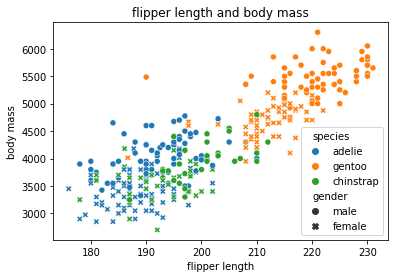

In [9]:
# Plot 1
sns.scatterplot(x='flipper_length_mm', y='body_mass_g', hue='species',style='gender', data=Final_cleaned_data)
plt.xlabel('flipper length')
plt.ylabel('body mass')
plt.title('flipper length and body mass')

Text(0.5, 1.0, 'bill length and body mass')

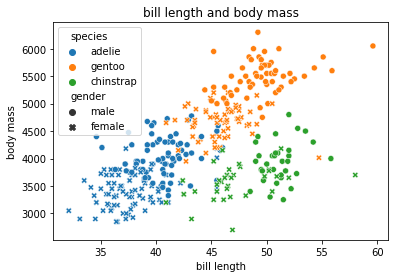

In [10]:
#plot 2
sns.scatterplot(x='bill_length_mm', y='body_mass_g', hue='species',style='gender', data=Final_cleaned_data)
plt.xlabel('bill length')
plt.ylabel('body mass')
plt.title('bill length and body mass')

,species,gender,penguin_count
0,adelie,female,79
1,adelie,male,73
2,chinstrap,female,35
3,chinstrap,male,32
4,gentoo,female,63
5,gentoo,male,62


<BarContainer object of 6 artists>

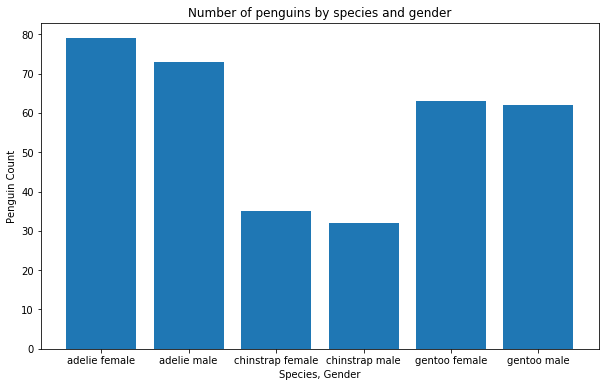

In [11]:
#plot 3
penguins_count=Final_cleaned_data.groupby(['species','gender']).size().reset_index(name='penguin_count')
display(penguins_count)

plt.figure(figsize=(10, 6))
plt.xlabel('Species, Gender')
plt.ylabel('Penguin Count')
plt.title('Number of penguins by species and gender')
plt.bar(penguins_count["species"] + " " + penguins_count["gender"], penguins_count["penguin_count"])

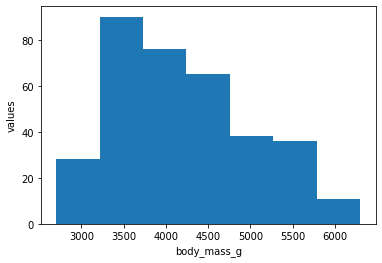

In [12]:
#plot 4
plt.hist(Final_cleaned_data["body_mass_g"], bins=7)
plt.xlabel("body_mass_g")
plt.ylabel("values")
plt.show()

,year,penguin_count
0,2007,110
1,2008,114
2,2009,120


<BarContainer object of 3 artists>

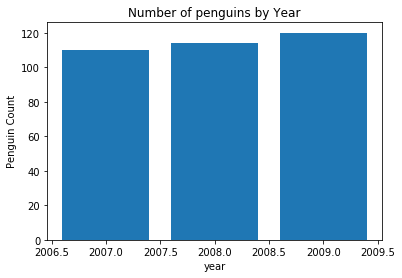

In [13]:
#plot 5
penguins_count=Final_cleaned_data.groupby(['year']).size().reset_index(name='penguin_count')
penguins_count["year"] = penguins_count["year"].astype(int)
display(penguins_count)

plt.xlabel('year')
plt.ylabel('Penguin Count')
plt.title('Number of penguins by Year')
plt.bar(penguins_count["year"], penguins_count["penguin_count"])

**Identify uncorrelated or unrelated features**

                        calorie requirement  average sleep duration  \
calorie requirement                1.000000               -0.055628   
average sleep duration            -0.055628                1.000000   
bill_length_mm                    -0.013800                0.052100   
bill_depth_mm                     -0.095124                0.007011   
flipper_length_mm                 -0.011418                0.063696   
body_mass_g                        0.051508                0.070035   
year                              -0.036791                0.043274   

                        bill_length_mm  bill_depth_mm  flipper_length_mm  \
calorie requirement          -0.013800      -0.095124          -0.011418   
average sleep duration        0.052100       0.007011           0.063696   
bill_length_mm                1.000000      -0.204724           0.624913   
bill_depth_mm                -0.204724       1.000000          -0.571343   
flipper_length_mm             0.624913      -0.5713

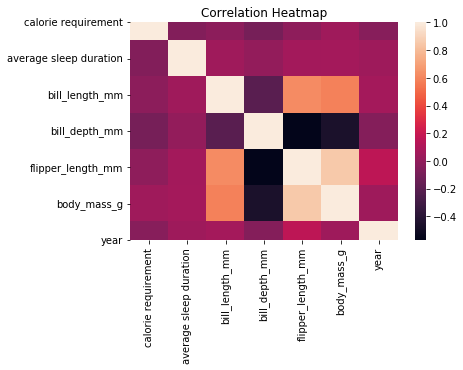

In [14]:
#Finding correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr=Final_cleaned_data.corr()
print(corr)
  
sns.heatmap(corr)
plt.title('Correlation Heatmap')
plt.show()


In [15]:
Final_cleaned_data.drop(columns=["year"],inplace=True)

 **Normalize non-categorical features**

In [16]:
#num_cols = ['bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
num_cols = ['calorie requirement', 'average sleep duration','bill_length_mm','bill_depth_mm','flipper_length_mm','body_mass_g']
for i in num_cols:
    min_value=Final_cleaned_data[i].min()
    max_value=Final_cleaned_data[i].max()
    Final_cleaned_data[i]=(Final_cleaned_data[i]-min_value)/(max_value-min_value)

In [17]:
#Converting catergorical to binary column using onehot encoding
Final_cleaned_data = pd.get_dummies(Final_cleaned_data, columns=['species', 'island','gender'], prefix=['species', 'island','gender'])

In [18]:
penguins_cleaned_scaled=Final_cleaned_data

In [19]:
penguins_cleaned_scaled.columns

Index(['calorie requirement', 'average sleep duration', 'bill_length_mm',
       'bill_depth_mm', 'flipper_length_mm', 'body_mass_g', 'species_adelie',
       'species_chinstrap', 'species_gentoo', 'island_biscoe', 'island_dream',
       'island_torgersen', 'gender_female', 'gender_male'],
      dtype='object')

In [20]:
display(penguins_cleaned_scaled)
penguins_cleaned_scaled.drop(columns=['gender_female'],inplace=True)

,calorie requirement,average sleep duration,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,species_adelie,species_chinstrap,species_gentoo,island_biscoe,island_dream,island_torgersen,gender_female,gender_male
0,0.366640,0.857143,0.109091,0.708067,0.300136,0.416667,1,0,0,1,0,0,0,1
1,0.055781,0.000000,0.432727,0.059524,0.600000,0.458333,0,0,1,1,0,0,1,0
2,0.401029,0.571429,0.486964,0.166667,0.581818,0.486111,0,0,1,1,0,0,1,0
3,0.770647,0.142857,0.494545,0.134771,0.690909,0.472222,0,0,1,1,0,0,1,0
4,0.456810,0.285714,0.560000,0.134771,0.600000,0.547197,0,0,1,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
339,0.357975,0.571429,0.861818,0.797619,0.563636,0.361111,0,1,0,0,1,0,0,1
340,0.164365,0.285714,0.414545,0.595238,0.472727,0.194444,0,1,0,0,1,0,1,0
341,0.959924,0.428571,0.636364,0.607143,0.309091,0.298611,0,1,0,0,1,0,0,1
342,0.325210,0.000000,0.680000,0.702381,0.618182,0.388889,0,1,0,0,1,0,0,1


In [21]:
penguins_cleaned_scaled.to_csv(r"/Users/adarshreddy/Desktop/Assignments/ML/adarshre_dharmaac_assignment1_final/penguins_preprocessed.csv",index=False)

***Diamond Dataset Data Preprocessing***

**Importing Libraries**

In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Handling missing values, Handle mismatched string formats.**

In [23]:
#Reading Dataset
df=pd.read_csv(r'/Users/adarshreddy/Downloads/noisy_datasets/diamond.csv')
df.drop('Unnamed: 0', axis=1, inplace=True)
categorical=["cut","color","clarity"]

#checking rows with null values
print("count of null values")
rows_with_null = df.isnull().sum(axis=1)
print(len(rows_with_null[rows_with_null > 0]))

mis_values = (df.isnull().sum())
print(mis_values)

#changing datatypes of numerical columns
for c in df.columns:
    if df[c].dtype=="object" and c not in categorical:
        df[c]=pd.to_numeric(df[c],errors='coerce')
        
#getting numerical columns
num_cols = df.select_dtypes(include=['float64', 'int64']).columns

#using interploate method to replace null values to retian the linear properties
for c in num_cols:
    df[c] = pd.to_numeric(df[c], errors='coerce')
    df[c] = df[c].interpolate(method='linear')

    
#replacing null values in categorical columns with mode.
modes=df[categorical].mode().iloc[0]

for i in categorical:
    df[i]=df[i].fillna(modes[i])
    
#handling case senstivity

def upperCase(y):
  return  str(y).upper()
df["clarity"]=df["clarity"].apply(upperCase)

def upperCase(x):
  return  str(x).upper()
df["cut"]=df["cut"].apply(upperCase)

def upperCase(z):
  return  str(z).upper()
df["color"]=df["color"].apply(upperCase)


df_clarity = df[-df['clarity'].astype(str).str.lower().isin(['true', 'false','maybe'])]
df_cut = df[-df['cut'].astype(str).str.lower().isin(['true', 'false','maybe'])]
df_color = df[-df['color'].astype(str).str.lower().isin(['true', 'false','maybe'])]


df['clarity'] = df_clarity['clarity']
df['cut'] = df_cut['cut']
df['color'] = df_color['color']
df=df.dropna()


print(df.head(10))

count of null values
4845
carat                                  1510
cut                                    1293
color                                  1512
clarity                                 353
average us salary                         0
number of diamonds mined (millions)       0
depth                                   694
table                                  1542
price                                  1583
x                                      1526
y                                      1221
z                                      1433
dtype: int64
   carat        cut color clarity  average us salary  \
0   0.23      IDEAL     E     SI2              31282   
1   0.21    PREMIUM     E     SI1              40049   
2   0.23       GOOD     E     VS1              33517   
3   0.29    PREMIUM     I     VS2              38495   
4   0.31       GOOD     J     SI2              34178   
5   0.24  VERY GOOD     J    VVS2              44700   
6   0.24  VERY GOOD     I    VVS1        

**Handling outliers**

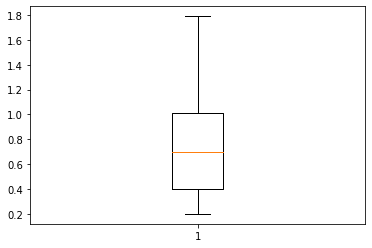

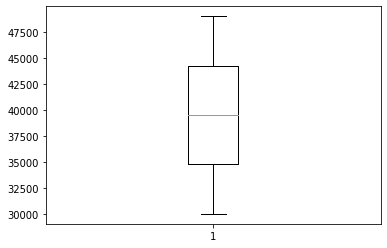

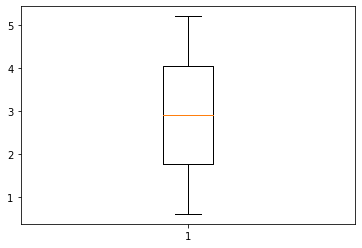

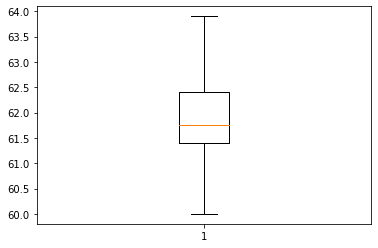

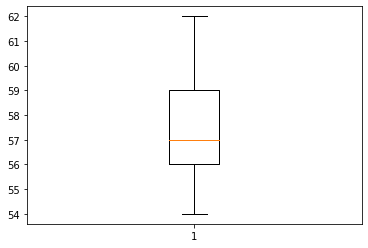

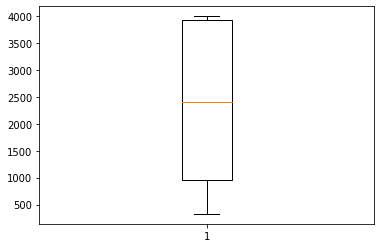

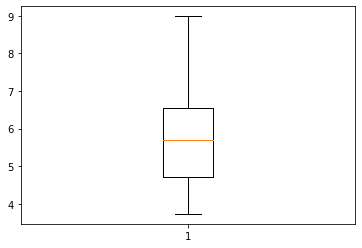

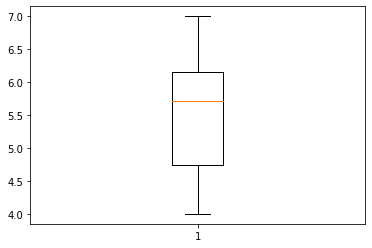

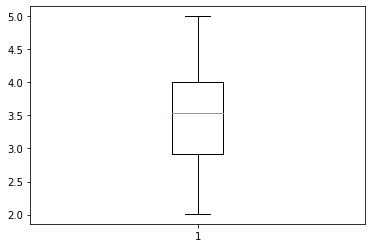

In [24]:
#handling outliers with conditional statments

mean=df[num_cols].mean()

df['carat']=np.where(df['carat']>=1.8,mean[0],df['carat'])
df['depth']=np.where((df['depth']>63.9) | (df['depth']<60),mean[3],df['depth'])
df['table']=np.where((df['table']>62) | (df['table']<54),mean[4],df['table'])
df['price']=np.where((df['price']>4000) & (df['price']>100),mean[5],df['price'])
df['x']=np.where((df['x']>9) | (df['x']<2),mean[6],df['x'])
df['y']=np.where((df['y']>7) | (df['y']<4),mean[7],df['y'])
df['z']=np.where((df['z']>5) | (df['z']<2),mean[8],df['z'])

for i in num_cols:
    plt.boxplot(df[i])
    plt.show()

In [25]:
#Key statistics

df_numerical=num_cols

#Mean
mean=df[df_numerical].mean()
display(mean)

#Median
median=df[df_numerical].median()
display(median)

#Mode
cat_cols=['cut','color','clarity']
mode=df[cat_cols].mode()
display(mode)

#min and max
min_values=df[df_numerical].min()
max_values=df[df_numerical].max()
display(min_values)
display(max_values)

#quartiles

display(df[num_cols].quantile(0.25))
display(df[num_cols].quantile(0.50))
display(df[num_cols].quantile(0.75))


#counts
print(df.nunique())


#standard deviation
deviation=df[df_numerical].std()
display(deviation)

carat                                      0.741272
average us salary                      39506.756430
number of diamonds mined (millions)        2.901581
depth                                     61.876647
table                                     57.375321
price                                   2414.448805
x                                          5.727417
y                                          5.492144
z                                          3.495058
dtype: float64

carat                                      0.700000
average us salary                      39528.000000
number of diamonds mined (millions)        2.910000
depth                                     61.750222
table                                     57.000000
price                                   2398.000000
x                                          5.700000
y                                          5.720000
z                                          3.530000
dtype: float64

,cut,color,clarity
0,IDEAL,G,SI1


carat                                      0.20
average us salary                      30000.00
number of diamonds mined (millions)        0.60
depth                                     60.00
table                                     54.00
price                                    326.00
x                                          3.73
y                                          4.00
z                                          2.01
dtype: float64

carat                                      1.79
average us salary                      48999.00
number of diamonds mined (millions)        5.20
depth                                     63.90
table                                     62.00
price                                   4000.00
x                                          8.99
y                                          7.00
z                                          5.00
dtype: float64

carat                                      0.40
average us salary                      34761.00
number of diamonds mined (millions)        1.75
depth                                     61.40
table                                     56.00
price                                    949.00
x                                          4.71
y                                          4.74
z                                          2.91
Name: 0.25, dtype: float64

carat                                      0.700000
average us salary                      39528.000000
number of diamonds mined (millions)        2.910000
depth                                     61.750222
table                                     57.000000
price                                   2398.000000
x                                          5.700000
y                                          5.720000
z                                          3.530000
Name: 0.5, dtype: float64

carat                                      1.010000
average us salary                      44229.000000
number of diamonds mined (millions)        4.050000
depth                                     62.400000
table                                     59.000000
price                                   3928.816447
x                                          6.540000
y                                          6.160000
z                                          4.010000
Name: 0.75, dtype: float64

carat                                    395
cut                                        5
color                                      7
clarity                                    8
average us salary                      17613
number of diamonds mined (millions)      461
depth                                    144
table                                    117
price                                   3562
x                                        963
y                                        545
z                                        600
dtype: int64


carat                                     0.380610
average us salary                      5485.550030
number of diamonds mined (millions)       1.326515
depth                                     0.827981
table                                     1.898587
price                                  1381.784607
x                                         1.113207
y                                         0.808487
z                                         0.635378
dtype: float64

**visualization graphs**

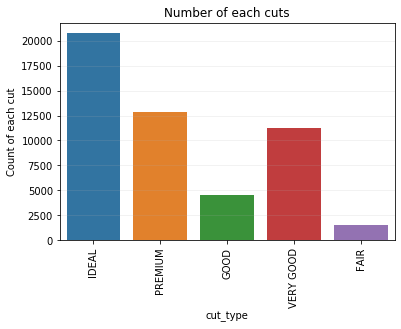

In [26]:
#plot 1
sns.countplot(x='cut', data=df)
plt.xlabel('cut_type')
plt.xticks(rotation=90)
plt.ylabel('Count of each cut')
plt.title('Number of each cuts')
plt.grid(axis='y',alpha=0.2)
plt.show()

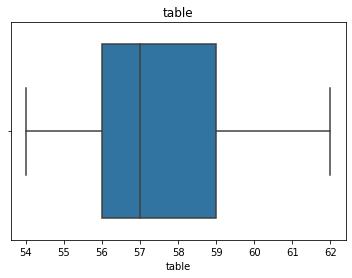

In [27]:
#plot 2
sns.boxplot(x='table', data=df)
plt.xlabel('table')
plt.title('table')
plt.show()

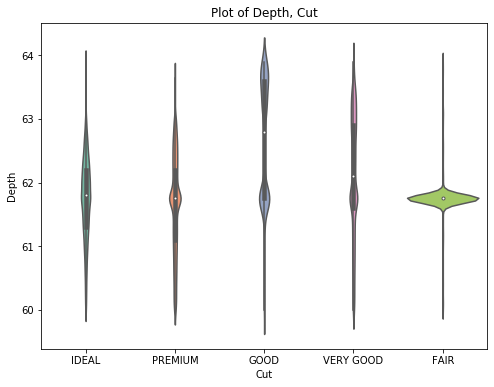

In [28]:
#plot 3
plt.figure(figsize=(8, 6))
sns.violinplot(x='cut', y='depth', data=df, palette='Set2')
plt.xlabel('Cut')
plt.ylabel('Depth')
plt.title('Plot of Depth, Cut')
plt.show()

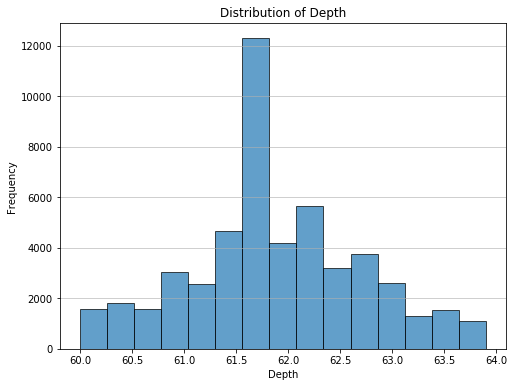

In [29]:
#plot 4
plt.figure(figsize=(8, 6))
plt.hist(df['depth'], bins=15, edgecolor='black', alpha=0.7)
plt.xlabel('Depth')
plt.ylabel('Frequency')
plt.title('Distribution of Depth')
plt.grid(axis='y', alpha=0.75)
plt.show()

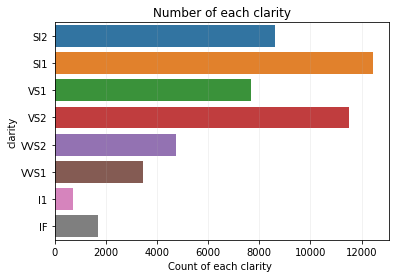

In [30]:
sns.countplot(y='clarity', data=df)
plt.ylabel('clarity')
plt.grid(axis='x',alpha=0.2)
plt.xlabel('Count of each clarity ')
plt.title('Number of each clarity')
plt.show()

**corelation matrix**

                                        carat  average us salary  \
carat                                1.000000           0.005387   
average us salary                    0.005387           1.000000   
number of diamonds mined (millions) -0.004974          -0.000162   
depth                                0.036328          -0.000557   
table                                0.171174           0.000903   
price                                0.891388           0.002020   
x                                    0.887121           0.005571   
y                                    0.799114          -0.000840   
z                                    0.948609           0.003664   

                                     number of diamonds mined (millions)  \
carat                                                          -0.004974   
average us salary                                              -0.000162   
number of diamonds mined (millions)                             1.000000   
depth          

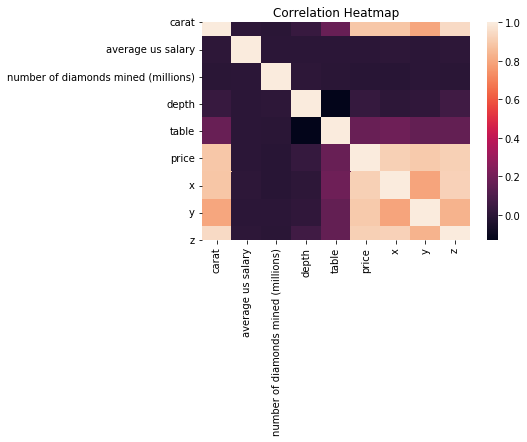

In [31]:
#Finding correlation
import seaborn as sns
import matplotlib.pyplot as plt

corr=df.corr()
print(corr)
  
sns.heatmap(corr)
plt.title('Correlation Heatmap')
plt.show()

#after checking the correlation we oberseve that number of diamonds mined (millions),average us salary ,
#number of diamonds mined (millions) abd depth have low correlation with carat which is our target variable.

**Convert features with string datatype to categorical using Onehotencoding**

In [32]:
df=pd.get_dummies(df, columns = ['cut','color','clarity'])

**Normalization**

In [33]:
n_col= ["average us salary","number of diamonds mined (millions)","depth","table","price","x","y","z"]
for val in n_col:
    min_val=df[val].min()
    max_val=df[val].max()
    df[val]=(df[val]-min_val)/(max_val-min_val)

In [34]:
#dropping columns
df= df.drop(["average us salary","number of diamonds mined (millions)"], axis=1)

In [35]:
df.to_csv(r"/Users/adarshreddy/Desktop/Assignments/ML/adarshre_dharmaac_assignment1_final/diamond_preprocessed.csv",index=False)

**References**
#https://seaborn.pydata.org/
#https://numpy.org/doc/stable/reference/arrays.html

**Contribution**

1.Adarsh Reddy Bandaru
Assignment Part 1 - 50

2.Dharma Acha 
Assignment Part 1 - 50